# Import the required libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Loading the datasets

In [25]:
df_legacy = pd.read_csv('legacy_data.csv')
df_legacy.head()

,Unnamed: 0,OrderID,OrderPrice,Amount_Charged,GiftBox,Preferences,Rating
0,0,171890429,30,34.0,"1985,4312",I’m more of a tea person 🍵$$$I prefer herbal/d...,0
1,1,171890412,30,36.0,"4443,5234","I don’t drink coffee or tea 🤭$$$ Chocolates, C...",0
2,2,171890410,50,115.0,"3823,4729,1002",I'm a coffee person ☕️$$$I like coffee but I d...,0
3,3,171890399,50,62.0,"4991,5236",I'm a coffee person ☕️$$$I like coffee but I d...,0
4,4,171890387,50,54.0,"1859,5061,5249",I’m more of a tea person 🍵$$$Any specialty tea...,0


In [26]:
df_sample = pd.read_csv('sample_output.csv')
df_sample.head()

,Unnamed: 0,OrderID,GiftBox
0,0,171890429,"1985,4312"
1,1,171890412,"4443,5234"
2,2,171890410,"3823,4729,1002"
3,3,171890399,"4991,5236"
4,4,171890387,"1859,5061,5249"


In [27]:
df_inventory = pd.read_csv('inventory.csv')
df_inventory.head()

,Unnamed: 0,ProductId,ProductName,Cost,Price,Rating,ProductTag,AvalQuantity,BoxDimensions
0,0,245,Guatemalan Signature Roast Ground Coffee,13.78,25.99,4.4427,"coffee, ground",93,8x4x3
1,1,278,Los Gigantes Colombia (Coffee Beans),10.75,20.00,4.3185,"coffee, artisanal",5,6x3x2
2,2,351,Rowkin Bit Charge Stereo (Silver),64.00,102.99,4.0000,music,6,NaN
3,3,424,Chocolate Fruit and Nut Dragee Sampler,21.00,35.00,4.4643,sweet,12,NaN
4,4,700,Pro Lens Kit for Phone Camera,24.50,42.99,4.3588,photography,1,8x4x3


# Getting one with the data

### Taking insights from Legacy data

In [28]:
df_legacy.head()

,Unnamed: 0,OrderID,OrderPrice,Amount_Charged,GiftBox,Preferences,Rating
0,0,171890429,30,34.0,"1985,4312",I’m more of a tea person 🍵$$$I prefer herbal/d...,0
1,1,171890412,30,36.0,"4443,5234","I don’t drink coffee or tea 🤭$$$ Chocolates, C...",0
2,2,171890410,50,115.0,"3823,4729,1002",I'm a coffee person ☕️$$$I like coffee but I d...,0
3,3,171890399,50,62.0,"4991,5236",I'm a coffee person ☕️$$$I like coffee but I d...,0
4,4,171890387,50,54.0,"1859,5061,5249",I’m more of a tea person 🍵$$$Any specialty tea...,0


In [29]:
# Dropping the Unnamed columns
df_legacy.drop(columns=['Unnamed: 0'], inplace=True)
df_legacy.head()

,OrderID,OrderPrice,Amount_Charged,GiftBox,Preferences,Rating
0,171890429,30,34.0,"1985,4312",I’m more of a tea person 🍵$$$I prefer herbal/d...,0
1,171890412,30,36.0,"4443,5234","I don’t drink coffee or tea 🤭$$$ Chocolates, C...",0
2,171890410,50,115.0,"3823,4729,1002",I'm a coffee person ☕️$$$I like coffee but I d...,0
3,171890399,50,62.0,"4991,5236",I'm a coffee person ☕️$$$I like coffee but I d...,0
4,171890387,50,54.0,"1859,5061,5249",I’m more of a tea person 🍵$$$Any specialty tea...,0


In [35]:
# Shape of the legacy data
df_legacy.shape

(1000, 6)

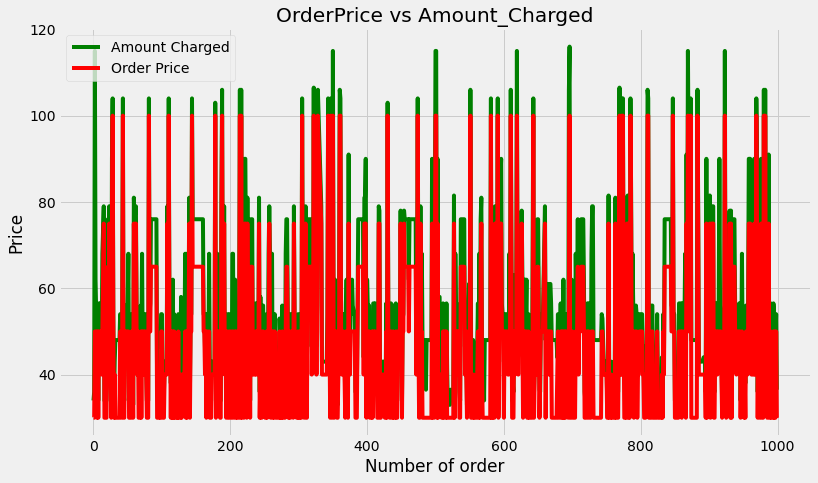

In [79]:
# Creating a plot between the 'OrderPrice' and 'Amount_Charged'
plt.figure(figsize=(12,7))
plt.plot(df_legacy['Amount_Charged'], c='g', label='Amount Charged')
plt.plot(df_legacy['OrderPrice'], c='r', label='Order Price')
plt.title('OrderPrice vs Amount_Charged')
plt.legend()
plt.xlabel('Number of order')
plt.ylabel('Price')
plt.show()

In [50]:
# Checking for the null data
df_legacy.isnull().sum()

OrderID           0
OrderPrice        0
Amount_Charged    1
GiftBox           0
Preferences       0
Rating            0
dtype: int64

In [53]:
# Fetching the null row
df_legacy[df_legacy.isnull().any(axis=1)]

,OrderID,OrderPrice,Amount_Charged,GiftBox,Preferences,Rating
595,171888616,40,NaN,"1859,5061",I’m more of a tea person 🍵$$$Any specialty tea...,0


In [55]:
# Drop the null value row
df_legacy.dropna(inplace=True)

In [75]:
# Removing the outliers i.e. all the records which has 'OrderPrice less than 25 and more than 120'
df_legacy = df_legacy[df_legacy['OrderPrice'] < 120]
df_legacy = df_legacy[df_legacy['OrderPrice'] > 25]

In [76]:
# New shape of the legacy data
df_legacy.shape

(972, 6)

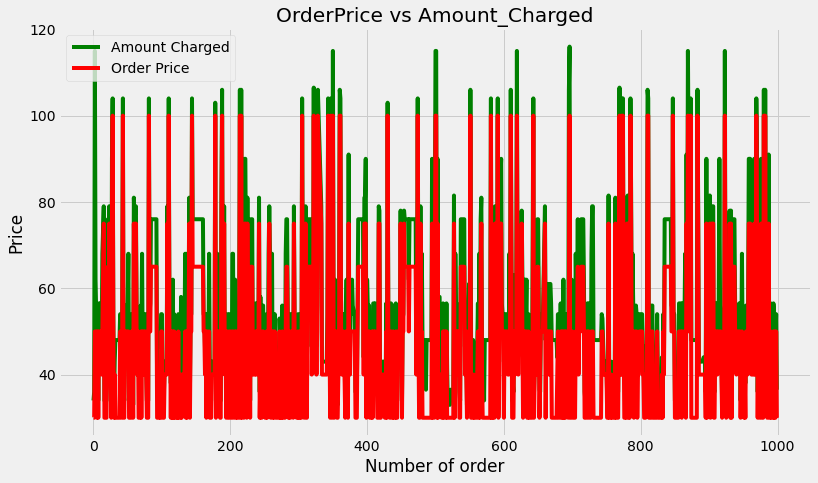

In [80]:
# Creating a plot between the 'OrderPrice' and 'Amount_Charged'
plt.figure(figsize=(12,7))
plt.plot(df_legacy['Amount_Charged'], c='g', label='Amount Charged')
plt.plot(df_legacy['OrderPrice'], c='r', label='Order Price')
plt.title('OrderPrice vs Amount_Charged')
plt.legend()
plt.xlabel('Number of order')
plt.ylabel('Price')
plt.show()

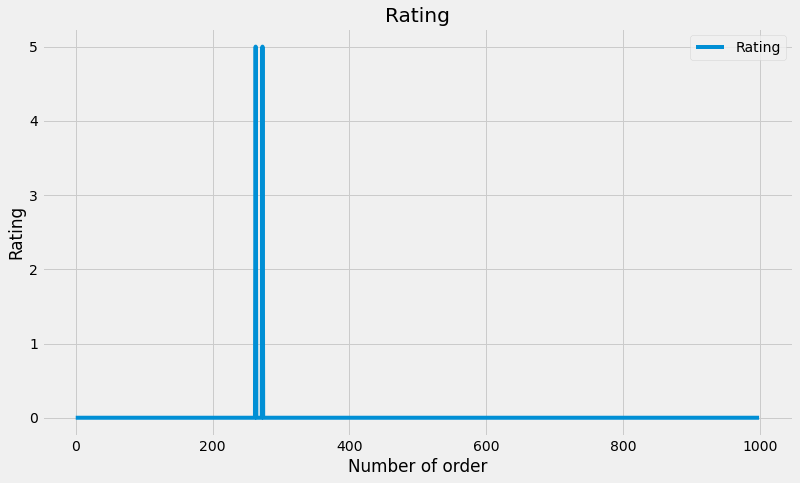

In [81]:
# Creating a plot for the ratings
plt.figure(figsize=(12,7))
plt.plot(df_legacy['Rating'], label='Rating')
plt.title('Rating')
plt.legend()
plt.xlabel('Number of order')
plt.ylabel('Rating')
plt.show()

### Taking insights from Sample data

In [78]:
df_sample.head()

,Unnamed: 0,OrderID,GiftBox
0,0,171890429,"1985,4312"
1,1,171890412,"4443,5234"
2,2,171890410,"3823,4729,1002"
3,3,171890399,"4991,5236"
4,4,171890387,"1859,5061,5249"


In [82]:
# Dropping the Unnamed columns
df_sample.drop(columns=['Unnamed: 0'], inplace=True)
df_sample.head()

,OrderID,GiftBox
0,171890429,"1985,4312"
1,171890412,"4443,5234"
2,171890410,"3823,4729,1002"
3,171890399,"4991,5236"
4,171890387,"1859,5061,5249"


In [83]:
# Shape of the sample data
df_sample.shape

(1000, 2)

In [87]:
# Check for the null value row
df_sample.isnull().sum()

OrderID    0
GiftBox    0
dtype: int64

### Taking insights from inventory data

In [84]:
df_inventory.head()

,Unnamed: 0,ProductId,ProductName,Cost,Price,Rating,ProductTag,AvalQuantity,BoxDimensions
0,0,245,Guatemalan Signature Roast Ground Coffee,13.78,25.99,4.4427,"coffee, ground",93,8x4x3
1,1,278,Los Gigantes Colombia (Coffee Beans),10.75,20.00,4.3185,"coffee, artisanal",5,6x3x2
2,2,351,Rowkin Bit Charge Stereo (Silver),64.00,102.99,4.0000,music,6,NaN
3,3,424,Chocolate Fruit and Nut Dragee Sampler,21.00,35.00,4.4643,sweet,12,NaN
4,4,700,Pro Lens Kit for Phone Camera,24.50,42.99,4.3588,photography,1,8x4x3


In [85]:
# Dropping the Unnamed columns
df_inventory.drop(columns=['Unnamed: 0'], inplace=True)
df_inventory.head()

,ProductId,ProductName,Cost,Price,Rating,ProductTag,AvalQuantity,BoxDimensions
0,245,Guatemalan Signature Roast Ground Coffee,13.78,25.99,4.4427,"coffee, ground",93,8x4x3
1,278,Los Gigantes Colombia (Coffee Beans),10.75,20.00,4.3185,"coffee, artisanal",5,6x3x2
2,351,Rowkin Bit Charge Stereo (Silver),64.00,102.99,4.0000,music,6,NaN
3,424,Chocolate Fruit and Nut Dragee Sampler,21.00,35.00,4.4643,sweet,12,NaN
4,700,Pro Lens Kit for Phone Camera,24.50,42.99,4.3588,photography,1,8x4x3


In [86]:
# Shape of the inventory data
df_inventory.shape

(342, 8)

In [88]:
# Check for the null value rows
df_inventory.isnull().sum()

ProductId          0
ProductName        0
Cost               0
Price              0
Rating             0
ProductTag         0
AvalQuantity       0
BoxDimensions    125
dtype: int64